---

<h2> Thí nghiệm</h2>

---

| Thông số ảnh hưởng |
|----------|
| Số Thế Hệ |

| Kỹ thuật ảnh hưởng |
|----------|
| Selection: Elitism Selection |
| Crossover: One-point crossover |
| Mutation: Bit-flip Mutation |

<h2>I. Thông số ảnh hưởng</h2>

Các bài toán Knapsack trong 6 test case có giá trị và quần thể khác nhau. Chúng ta sẽ tiến hành sử dụng số lượng từ 100 đến 500 cá thể và các yếu tô đo lường: 

- Fitness cuối cùng: Giá trị tối ưu của quần thể sau khi chạy thuật toán.
- Tốc độ hội tụ: Số thế hệ cần thiết để đạt được kết quả tối ưu.
- Độ ổn định (std): Sự thay đổi trong Fitness giữa các cá thể trong quần thể.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from Genetic_Algorithm import * 

Nhập số liệu tính toán:

In [2]:
items, max_capacity = get_user_input()
get_info()


Thông tin bài toán:

Vật phẩm 1: Weight = 4, Value = 2
Vật phẩm 2: Weight = 2, Value = 4
Vật phẩm 3: Weight = 5, Value = 6
Vật phẩm 4: Weight = 9, Value = 9
Vật phẩm 5: Weight = 10, Value = 7
Vật phẩm 6: Weight = 14, Value = 11
Vật phẩm 7: Weight = 16, Value = 12
Vật phẩm 8: Weight = 18, Value = 4
Vật phẩm 9: Weight = 13, Value = 8
Vật phẩm 10: Weight = 19, Value = 10
Vật phẩm 11: Weight = 4, Value = 2
Vật phẩm 12: Weight = 1, Value = 8
Vật phẩm 13: Weight = 3, Value = 12
Vật phẩm 14: Weight = 7, Value = 9

Maximum capacity = 40


Ghi lại thông số thay đổi với từng kích thước quần thể

In [28]:
# Thử nghiệm với các số lượng quần thể khác nhau
generation_sizes = [100, 200, 500]
experiment_results = {}

def run_experiment_with_population(gen_size):
    global GENERATIONS, fitness_history
    
    # Lưu giá trị GENERATIONS ban đầu
    original_gen_size = GENERATIONS
    
    # Thay đổi GENERATIONS cho thử nghiệm
    GENERATIONS = gen_size
    
    # Thực hiện thuật toán di truyền
    best_solution, best_fitness = genetic_algorithm()
    
    # Lưu kết quả
    result = {
        'best_solution': best_solution,
        'best_fitness': best_fitness,
        'fitness_history': fitness_history.copy()
    }
    
    # Reset fitness_history sau mỗi lần thử nghiệm
    fitness_history.clear()
    
    # Khôi phục giá trị GENERATIONS ban đầu
    GENERATIONS = original_gen_size
    
    return result

# Thực hiện các thử nghiệm
plt.figure(figsize=(12, 6))

for gen_size in generation_sizes:
    print(f"\nThử nghiệm với kích thước quần thể: {gen_size}")
    
    # Chạy thử nghiệm
    result = run_experiment_with_population(gen_size)
    
    # Lưu kết quả
    experiment_results[gen_size] = result
    
    # In kết quả
    print(f"Best Solution: {result['best_solution']}")
    print(f"Best Fitness: {result['best_fitness']}")
    print(f"Fitness History: {result['fitness_history']}")


Thử nghiệm với kích thước quần thể: 100
Best Solution: [0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1]
Best Fitness: 56
Fitness History: [55, 49, 53, 49, 51, 49, 54, 54, 51, 52, 54, 53, 50, 50, 48, 49, 49, 53, 46, 53, 49, 48, 46, 50, 52, 49, 48, 52, 48, 49, 49, 52, 55, 52, 55, 52, 52, 52, 52, 52, 53, 50, 51, 51, 53, 47, 52, 53, 51, 51, 53, 53, 50, 50, 47, 50, 41, 48, 52, 53, 53, 52, 53, 51, 53, 53, 52, 50, 50, 47, 51, 53, 46, 53, 49, 53, 49, 49, 47, 53, 53, 53, 55, 53, 53, 53, 55, 50, 49, 52, 51, 43, 49, 55, 55, 49, 53, 55, 55, 55, 55, 51, 49, 53, 52, 52, 52, 56, 51, 50, 52, 50, 52, 48, 51, 51, 51, 51, 50, 53, 47, 49, 51, 53, 50, 50, 55, 50, 53, 52, 54, 54, 53, 47, 49, 53, 53, 49, 52, 46, 47, 51, 53, 53, 48, 48, 48, 46, 43, 49, 54, 52, 55, 50, 51, 55, 46, 51, 52, 52, 50, 55, 53, 51, 50, 53, 53, 53, 53, 53, 47, 51, 48, 52, 53, 49, 53, 52, 52, 52, 49, 52, 52, 50, 52, 51, 50, 50, 50, 50, 54, 54, 54, 54, 50, 49, 50, 50, 50, 50]

Thử nghiệm với kích thước quần thể: 200
Best Solution: [0, 1, 1, 

<Figure size 1200x600 with 0 Axes>

Fitness qua các số thế hệ khác nhau 

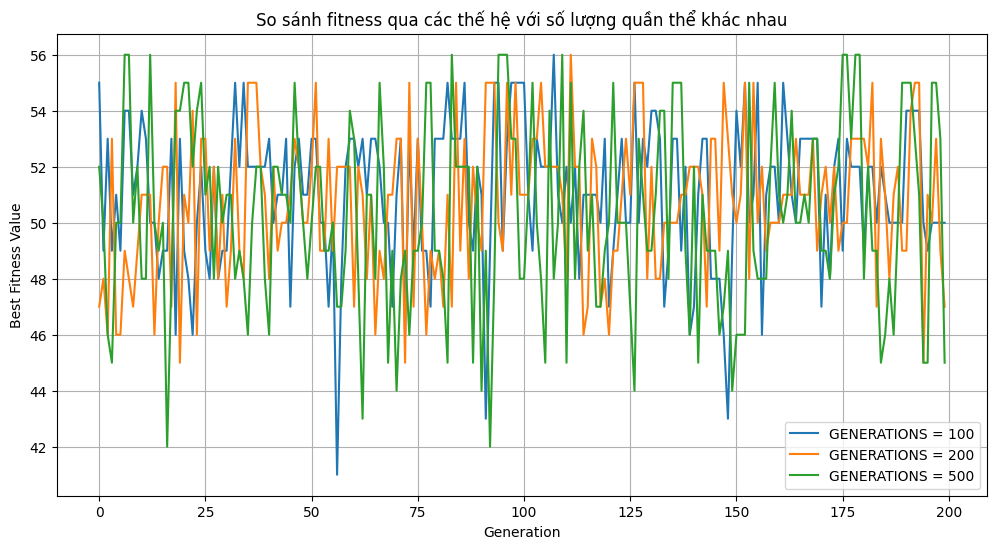

In [29]:
plt.figure(figsize=(12, 6))
for gen_size in generation_sizes:
    plt.plot(experiment_results[gen_size]['fitness_history'], 
             label=f'GENERATIONS = {gen_size}')

plt.xlabel('Generation')
plt.ylabel('Best Fitness Value')
plt.title('So sánh fitness qua các thế hệ với số lượng quần thể khác nhau')
plt.legend()
plt.grid(True)
plt.show()

Bảng kết quả
| Generation Size      | Best Fitness                               | Convergence Speed                            | Stability (Std)                        |
|-----------------------|--------------------------------------------|---------------------------------------------|----------------------------------------|
| Số lượng quần thể  | Fitness tốt nhất trong quần thể tại một thế hệ nhất định | Tốc độ hội tụ (số thế hệ hoặc thời gian để đạt mức tối ưu) | Độ ổn định trung bình qua các thế hệ |

In [30]:
print("\nKết quả chi tiết:")
print("-" * 80)
print(f"| {'GENERATIONS':^15} | {'Best Fitness':^15} | {'Convergence Speed':^20} | {'Stability (Std)':^17} |")
print("-" * 80)
for gen_size in generation_sizes:
    history = experiment_results[gen_size]["fitness_history"]
    final_fitness = history[-1]
    
    # Tính tốc độ hội tụ (số thế hệ để đạt 95% fitness cuối cùng)
    convergence_gen = next(
        (i for i, x in enumerate(history) if x >= 0.95 * final_fitness), len(history)
    )
    
    # Tính độ ổn định (trung bình cộng std qua các thế hệ)
    stability_std = np.std(history)

    print(f"| {gen_size:^15} | {final_fitness:^15} | {convergence_gen:^20} | {round(stability_std,2):^17.2f} |")

print("-" * 80)


Kết quả chi tiết:
--------------------------------------------------------------------------------
|   GENERATIONS   |  Best Fitness   |  Convergence Speed   |  Stability (Std)  |
--------------------------------------------------------------------------------
|       100       |       50        |          0           |       2.52        |
|       200       |       47        |          0           |       2.56        |
|       500       |       45        |          0           |       3.32        |
--------------------------------------------------------------------------------


Phân tích độ ổn định của fitness qua các thế hệ

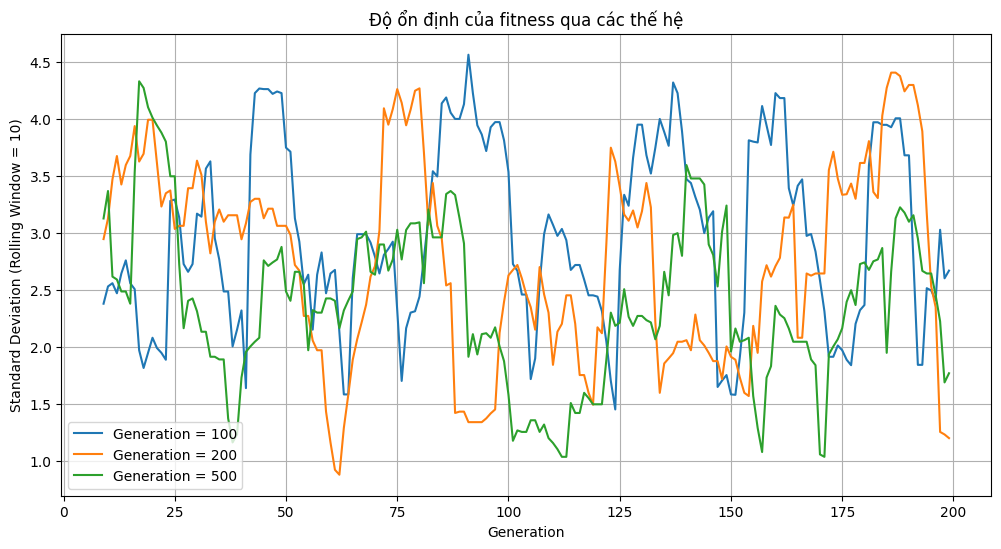

In [19]:
# Phân tích thêm về tính ổn định
plt.figure(figsize=(12, 6))
for gen_size in generation_sizes:
    history = experiment_results[gen_size]['fitness_history']
    # Tính độ dao động của fitness
    rolling_std = pd.Series(history).rolling(window=10).std()
    plt.plot(rolling_std, label=f'Generation = {gen_size}')

plt.xlabel('Generation')
plt.ylabel('Standard Deviation (Rolling Window = 10)')
plt.title('Độ ổn định của fitness qua các thế hệ')
plt.legend()
plt.grid(True)
plt.show()

Tổng Kết Sau Khi Thí Nghiệm

In [31]:
# Tổng kết
for gen_size in generation_sizes:
    history = experiment_results[gen_size]['fitness_history']
    final_fitness = history[-1]
    
    print(f"\nSố lượng thế hệ {gen_size}:")
    print(f"- Fitness cuối cùng: {final_fitness}")
    print(f"- Tốc độ hội tụ: {next((i for i, x in enumerate(history) if x >= 0.95 * final_fitness), len(history))} thế hệ")
    print(f"- Độ ổn định (std): {np.std(history):.2f}")


Số lượng thế hệ 100:
- Fitness cuối cùng: 50
- Tốc độ hội tụ: 0 thế hệ
- Độ ổn định (std): 2.52

Số lượng thế hệ 200:
- Fitness cuối cùng: 47
- Tốc độ hội tụ: 0 thế hệ
- Độ ổn định (std): 2.56

Số lượng thế hệ 500:
- Fitness cuối cùng: 45
- Tốc độ hội tụ: 0 thế hệ
- Độ ổn định (std): 3.32


---

<h2> Tổng hợp</h2>

---

<h3> 1.Các tình huống</h3>

- Chạy nhiều lần mỗi test case, từ 10 đến 20.
- Kết quả sau mỗi lần chạy toàn bộ 6 test case ở file Testcase.txt.
- Tính trung bình cộng toàn bộ thông số bao gồm: fitness cuối cùng, tốc độ hội tụ, độ ổn định sau số lần chạy tuỳ ý.

    -Testcase 1:

| Số lượng quần thể | Fitness cuối cùng | Tốc độ hội tụ (thế hệ) | Độ ổn định (std) |
|----------------------|-------------------|-------------------------|------------------
| 100                 | 50               | 2                       | 3.07             |
| 200                 | 52                | 4                       | 3.08            |
| 500                 | 50                | 1                       | 3.04             |

    -Testcase 2:

| Số lượng quần thể | Fitness cuối cùng | Tốc độ hội tụ (thế hệ) | Độ ổn định (std) |
|----------------------|-------------------|-------------------------|------------------|
| 100                 | 62               | 1                       | 3.07             |
| 200                 | 62                | 4                       | 4.03            |
| 500                 | 50                | 1                       | 3.66             |

    -Testcase 3:

| Số lượng quần thể | Fitness cuối cùng | Tốc độ hội tụ (thế hệ) | Độ ổn định (std) |
|----------------------|-------------------|-------------------------|------------------|
| 100                 | 2803               | 8                       | 84.82             |
| 200                 | 2809                | 6                       | 86.95            |
| 500                 | 2705                | 7                       | 89.5             |

    -Testcase 4:

| Số lượng quần thể | Fitness cuối cùng | Tốc độ hội tụ (thế hệ) | Độ ổn định (std) |
|----------------------|-------------------|-------------------------|------------------|
| 100                 | 6500               | 2                       | 170.94             |
| 200                 | 6568                | 4                       | 167.79           |
| 500                 | 6425               | 1                       | 172.22            |

    -Testcase 5:

| Số lượng quần thể | Fitness cuối cùng | Tốc độ hội tụ (thế hệ) | Độ ổn định (std) |
|----------------------|-------------------|-------------------------|------------------|
| 100                 | 62553               | 13                       | 2837.89             |
| 200                 | 60850                | 10                       | 3383.41           |
| 500                 | 65709               | 16                       | 2604.29           |

    -Testcase 6:

| Số lượng quần thể | Fitness cuối cùng | Tốc độ hội tụ (thế hệ) | Độ ổn định (std) |
|----------------------|-------------------|-------------------------|------------------|
| 100                 | 46512               | 15                       | 2265.37             |
| 200                 | 43159                | 13                       | 3010.79           |
| 500                 | 46420               | 20                       | 2532.95            |

<h3> 2. Phân tích và đánh giá</h3>

1. Fitness cuối cùng:
- Quần thể nhỏ :Fitness cuối cùng ở các quần thể nhỏ thường đạt mức không cao bằng quần thể lớn. Điều này là do quần thể nhỏ có ít đa dạng hơn, dẫn đến khả năng tìm kiếm các lời giải tối ưu thấp hơn.
- Quần thể lớn :Fitness cuối cùng của quần thể lớn thường tốt hơn, đặc biệt với các bài toán phức tạp. Sự đa dạng trong quần thể giúp nó khai phá được nhiều hướng hơn để tìm lời giải.
2. Tốc độ hội tụ (thế hệ):
- Quần thể nhỏ :Tốc độ hội tụ của quần thể nhỏ nhanh hơn, thường mất ít thế hệ hơn để đạt hội tụ, nhưng có nguy cơ rơi vào cực trị cục bộ.
- Quần thể lớn :Hội tụ chậm hơn vì cần thời gian để đánh giá đa dạng trong quần thể. Tuy nhiên, điều này cho phép tìm kiếm các lời giải tốt hơn.
3. Độ ổn định (Standard Deviation - Std):
- Quần thể nhỏ :Độ ổn định của quần thể nhỏ thấp hơn, do số lượng cá thể ít, dễ dẫn đến dao động giữa các kết quả.
- Quần thể lớn : Độ ổn định cao hơn, vì sự đa dạng trong quần thể giúp giảm biến động trong kết quả.

 Khuyến nghị: 

Không gian tìm kiếm nhỏ, thuật toán hội tụ nhanh -> Số thế hệ có thể <100.
Không gian tìm kiếm lớn, cần thời gian khám phá nhiều hơn -> Số thế hệ thường >200.